In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.fft 
import pmdarima as pm
import itertools
import statsmodels.api as sm
import datetime


os.chdir('/home/etienne/data/spikes')
spikes3=pd.read_csv('spikesrat3.csv')

In [2]:
import cv2
def window(spikes,delta):
    '''
    Entry: number of spikes per hour
           delta which is the number of time points chosen to average
           
    Return: the unweighted downsampled temporal network of new size (time points)/delta
    '''
    Filter=np.ones((delta,))

    m=np.convolve(spikes,Filter,mode='valid')[::delta]
    return(m)

In [3]:
spikes=np.array(spikes3)[:,0]
delta=24

Filter=np.ones((delta,))/delta

spikespd=window(spikes,delta)

In [4]:
from scipy.signal import sosfiltfilt,butter

spikesph=spikes[240:]
spikesphr=spikes[240:-240]
signalt=spikespd[10:]

fh=1/96*2

filtre=butter(10,[fh],'low',output='sos')

spkf=sosfiltfilt(filtre,spikesph)
spkfr=sosfiltfilt(filtre,spikesphr)

In [1]:
plt.figure(figsize=(16,8))

plt.plot(np.arange(len(spkf))/24,spikesph)
plt.plot(np.arange(len(spkf))/24,(spkf))
#plt.plot(np.arange(len(spkf))/24,(spikes[240:]))
plt.plot(np.arange(len(spkfr[:-96]))/24,spkfr[:-96])
plt.bar(np.arange(56),signalt/24,color=(0,1,0,0.3))

NameError: name 'plt' is not defined

(0.0, 0.1)

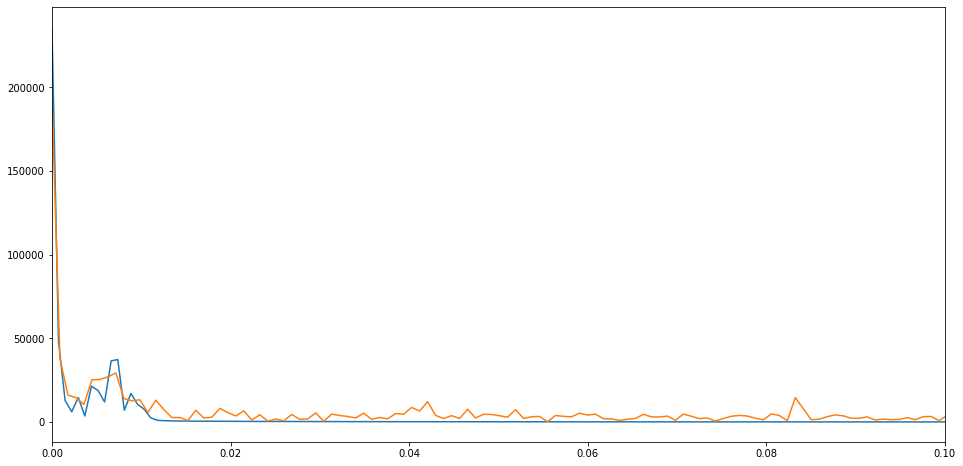

In [8]:
from scipy.fft import fft, fftfreq, fftshift

DFT=fft(spkf)
sp=fftshift(DFT)
freq = fftshift(fftfreq(spkf.shape[-1]))

DFTr=fft(spikes[240:-240])
spr=fftshift(DFTr)
freqr = fftshift(fftfreq(spkfr.shape[-1]))


plt.figure(figsize=(16,8))
plt.plot(freq, np.sqrt((sp.imag)**2 +(sp.real)**2))
plt.plot(freqr, np.sqrt((spr.imag)**2 +(spr.real)**2))

plt.xlim((0,0.1))



In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

datelist=[]
ndays=4

signal=spkfr[:-ndays*24]

timedelta=datetime.timedelta(hours=1)
date0=datetime.datetime(2015, 8, 9,16, minute=0, second=0, microsecond=0)

for k in range(len(signal)):
    date=date0+k*timedelta
    datelist.append(date)
    
    
df = pd.DataFrame([datelist,signal], ['ds','y']).T
df.set_index('ds',inplace=True)

In [22]:
from statsmodels.tsa.stattools import adfuller
adfuller((df.shift(1)-df).dropna())[1]

0.9786852729574782